# Uber Data Analysis (EDA)

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
df = pd.read_csv("/content/UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [148]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

checking for null values

In [149]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

# Imputation

In [150]:
df['START'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [151]:
df.START = df.START.fillna('Cary')

In [152]:
df['STOP'].value_counts()

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64

In [153]:
df.STOP = df.STOP.fillna('Cary')

In [154]:
df['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

In [155]:
df.CATEGORY = df.CATEGORY.fillna('Business')

In [156]:
df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [157]:
df.PURPOSE = df.PURPOSE.fillna('Meeting')

In [158]:
df.isnull().sum()

START_DATE    0
END_DATE      1
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [159]:
df['END_DATE'].value_counts()

6/28/2016 23:59     2
01-01-2016 21:17    1
9/28/2016 2:37      1
9/27/2016 14:43     1
9/27/2016 8:35      1
                   ..
5/27/2016 20:53     1
5/27/2016 20:30     1
5/23/2016 21:21     1
5/23/2016 20:27     1
12/31/2016 23:51    1
Name: END_DATE, Length: 1154, dtype: int64

In [160]:
df.END_DATE = df.END_DATE.fillna('6/28/2016 23:59')

In [161]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [162]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Feature Engineering

In [163]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [164]:
# Convert the 'START_DATE' and 'END_DATE' columns to datetime with 'coerce'
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Now, check the data types of 'START_DATE' and 'END_DATE' columns
print("Data type of 'START_DATE':", df['START_DATE'].dtype)
print("Data type of 'END_DATE':", df['END_DATE'].dtype)

Data type of 'START_DATE': datetime64[ns]
Data type of 'END_DATE': datetime64[ns]


Finding of average miles

In [165]:
average_miles_by_purpose = df.groupby('PURPOSE')['MILES'].mean()
average_miles_by_purpose

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             28.912319
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Meeting'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

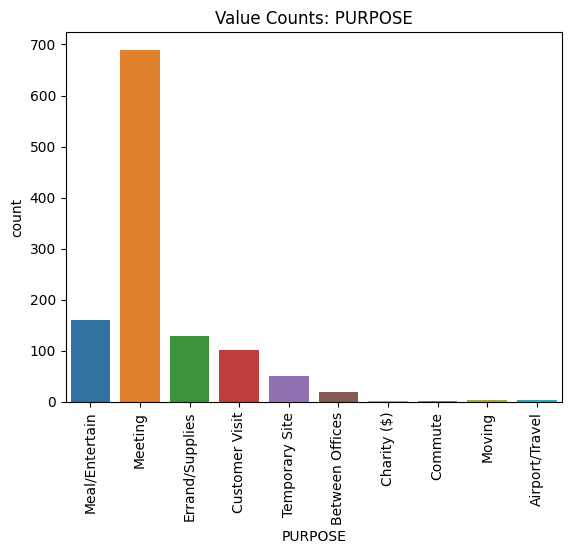

In [166]:
sns.countplot(x=df["PURPOSE"])
plt.title("Value Counts: PURPOSE")
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

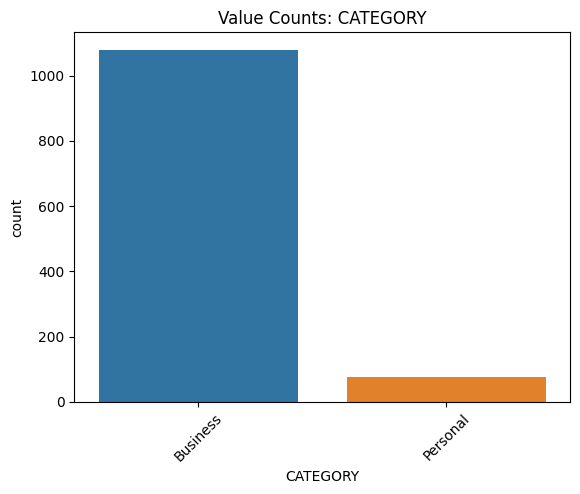

In [167]:
sns.countplot(x=df["CATEGORY"])
plt.title("Value Counts: CATEGORY")
plt.xticks(rotation=45)

In [168]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

# Creating new features

In [169]:
df['day_name'] = df['START_DATE'].dt.day_name()
df["month"] = df['START_DATE'].dt.month_name()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

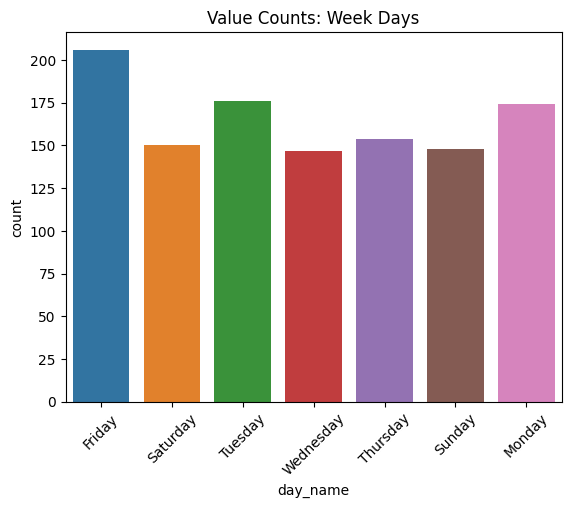

In [170]:
sns.countplot(x=df["day_name"])
plt.title("Value Counts: Week Days")
plt.xticks(rotation=45)

In [171]:
time_periods = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

df['time_label'] = pd.cut(df['START_DATE'].dt.hour, bins=time_periods, labels=labels, right=False)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Night'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Evening')])

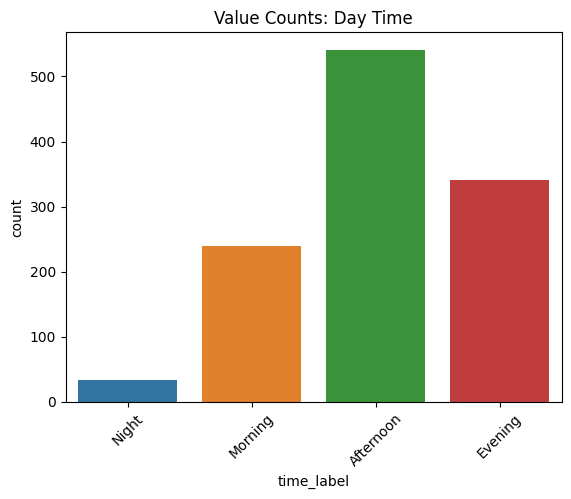

In [172]:
sns.countplot(x=df["time_label"])
plt.title("Value Counts: Day Time")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Meeting'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

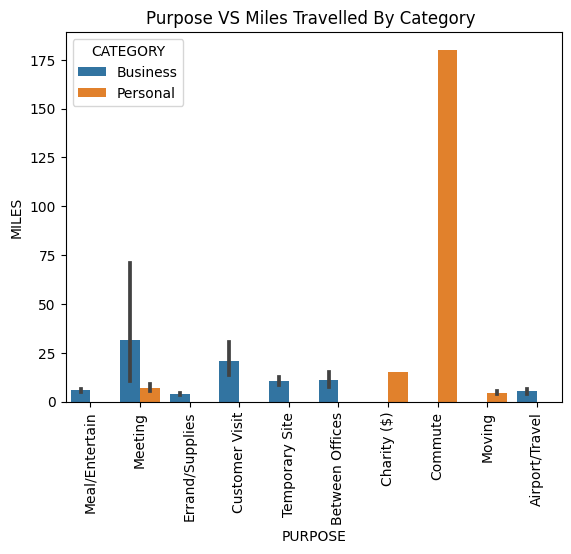

In [173]:
sns.barplot(x= df["PURPOSE"], y= df['MILES'],hue = df["CATEGORY"])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)

# Density plot for miles

<ipython-input-174-38828a7c7dda>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MILES"])


Text(0.5, 1.0, 'Density Plot for Miles')

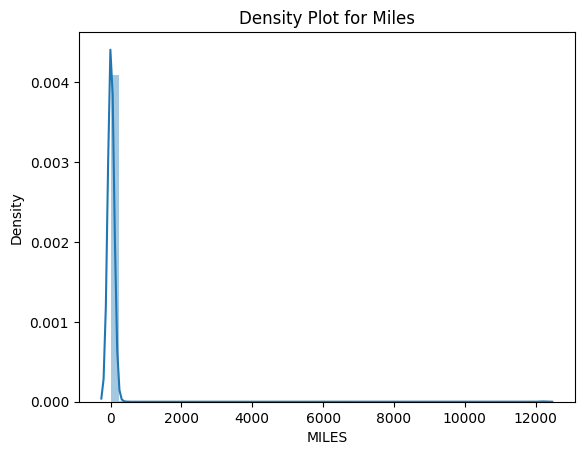

In [174]:
import warnings
sns.distplot(df["MILES"])
plt.title("Density Plot for Miles")